<a href="https://colab.research.google.com/github/minson18/AI-Capstone-Program1/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/AI總整/prog1') 
#os.listdir()

In [ ]:
device = "cuda"

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models 
from torchvision.utils import make_grid
import string
from tqdm.notebook import tqdm
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import multiprocessing as mp
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
# Function to make average reports 
# by multilpe classification_report dict.
from functools import reduce
def report_average(reports):
    mean_dict = dict()
    for label in reports[0].keys():
        dictionary = dict()

        if label in 'accuracy':
            mean_dict[label] = sum(d[label] for d in reports) / len(reports)
            continue

        for key in reports[0][label].keys():
            dictionary[key] = sum(d[label][key] for d in reports) / len(reports)
        mean_dict[label] = dictionary

    return mean_dict

#CNN based training and validation

In [ ]:
# Create a dataset of RGB images
RGB_train_transform=transforms.Compose([
        transforms.Resize([224, 224]),             
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                  [0.229, 0.224, 0.225])
])
RGB_dataset=datasets.ImageFolder(root=("dataset1"),transform=RGB_train_transform)
class_names=RGB_dataset.classes
print(class_names)

In [ ]:
# define different size of dataset
part_RGB_train_indices, _ = train_test_split(list(range(len(RGB_dataset.targets))), train_size=0.2, stratify=RGB_dataset.targets)

  0%|          | 0/21 [00:00<?, ?it/s]

epoch: 1 loss: 1.0604442358016968 accuracy: 0.5058823823928833%


  0%|          | 0/21 [00:00<?, ?it/s]

epoch: 2 loss: 0.3952603042125702 accuracy: 0.8352941274642944%


  0%|          | 0/21 [00:00<?, ?it/s]

epoch: 3 loss: 0.33010151982307434 accuracy: 0.8588235378265381%


  0%|          | 0/21 [00:00<?, ?it/s]

epoch: 4 loss: 0.3571588099002838 accuracy: 0.9176470637321472%


  0%|          | 0/21 [00:00<?, ?it/s]

epoch: 5 loss: 0.44836366176605225 accuracy: 0.8941176533699036%


  0%|          | 0/22 [00:00<?, ?it/s]

epoch: 1 loss: 0.8348991274833679 accuracy: 0.785714328289032%


  0%|          | 0/22 [00:00<?, ?it/s]

epoch: 2 loss: 0.47010889649391174 accuracy: 0.785714328289032%


  0%|          | 0/22 [00:00<?, ?it/s]

epoch: 3 loss: 0.21434235572814941 accuracy: 0.8809524178504944%


  0%|          | 0/22 [00:00<?, ?it/s]

epoch: 4 loss: 0.1742943674325943 accuracy: 0.9047619104385376%


  0%|          | 0/22 [00:00<?, ?it/s]

epoch: 5 loss: 0.09071455895900726 accuracy: 0.9642857313156128%


  0%|          | 0/22 [00:00<?, ?it/s]

epoch: 1 loss: 0.972624659538269 accuracy: 0.5357142686843872%


  0%|          | 0/22 [00:00<?, ?it/s]

epoch: 2 loss: 0.45637884736061096 accuracy: 0.785714328289032%


  0%|          | 0/22 [00:00<?, ?it/s]

epoch: 3 loss: 0.018550969660282135 accuracy: 0.9404761791229248%


  0%|          | 0/22 [00:00<?, ?it/s]

epoch: 4 loss: 0.04417701065540314 accuracy: 0.9166666865348816%


  0%|          | 0/22 [00:00<?, ?it/s]

epoch: 5 loss: 0.03454948216676712 accuracy: 0.9523809552192688%


  0%|          | 0/22 [00:00<?, ?it/s]

epoch: 1 loss: 0.9350293278694153 accuracy: 0.6904761791229248%


  0%|          | 0/22 [00:00<?, ?it/s]

epoch: 2 loss: 0.40679770708084106 accuracy: 0.8690476417541504%


  0%|          | 0/22 [00:00<?, ?it/s]

epoch: 3 loss: 0.3772332966327667 accuracy: 0.8452380895614624%


  0%|          | 0/22 [00:00<?, ?it/s]

epoch: 4 loss: 0.20503775775432587 accuracy: 0.9047619104385376%


  0%|          | 0/22 [00:00<?, ?it/s]

epoch: 5 loss: 0.19670931994915009 accuracy: 0.9166666865348816%


  0%|          | 0/22 [00:00<?, ?it/s]

epoch: 1 loss: 1.0016781091690063 accuracy: 0.523809552192688%


  0%|          | 0/22 [00:00<?, ?it/s]

epoch: 2 loss: 0.2399282455444336 accuracy: 0.9166666865348816%


  0%|          | 0/22 [00:00<?, ?it/s]

epoch: 3 loss: 0.09500293433666229 accuracy: 0.9523809552192688%


  0%|          | 0/22 [00:00<?, ?it/s]

epoch: 4 loss: 0.23664572834968567 accuracy: 0.9166666865348816%


  0%|          | 0/22 [00:00<?, ?it/s]

epoch: 5 loss: 0.030453020706772804 accuracy: 0.9761905074119568%


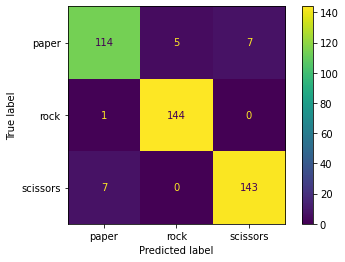

              precision    recall  f1-score    support
paper          0.937333  0.900694  0.918103  25.200000
rock           0.962290  0.994118  0.977468  29.000000
scissors       0.954836  0.954867  0.954192  30.000000
accuracy       0.952521  0.952521  0.952521   0.952521
macro avg      0.951486  0.949893  0.949921  84.200000
weighted avg   0.953283  0.952521  0.952206  84.200000


In [ ]:
cv = KFold(n_splits=5, shuffle=True)
CNN_CMs = [] # all Confusion Matrices
CNN_reports = [] # all Classification Reports
# indeices_list define whether use whole dataset
#indices_list = part_RGB_train_indices
indices_list = list(range(len(CNN_dataset.targets)))
indices_list = np.array(indices_list)

# Cross Validation
for train_index, test_index in cv.split(indices_list):
  # Model Define
  net = models.alexnet()
  net.classifier=nn.Sequential(nn.Linear(9216,1024),
                    nn.ReLU(),
                    nn.Dropout(p=0.5),
                    nn.Linear(1024,3),  
                    nn.LogSoftmax(dim=1))  
  net = net.to(device)

  criterion=nn.CrossEntropyLoss()
  optimizer=torch.optim.Adam(net.parameters(),lr=0.0001)

  # Define Dataset and Dataloader
  train_data = torch.utils.data.Subset(RGB_dataset, indices_list[train_index])
  test_data = torch.utils.data.Subset(RGB_dataset, indices_list[test_index])

  train_loader=DataLoader(train_data,batch_size=16,shuffle=True)
  test_loader=DataLoader(test_data,batch_size=64)

  # Training Process
  epochs = 5
  for i in range(epochs):
    for images, labels in tqdm(train_loader):
      images = images.to(device)
      labels = labels.to(device)
      y_pred=net(images)
      loss=criterion(y_pred, labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()      

    with torch.no_grad():
      corrects = 0
      totals = 0
      for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        y_val=net(images)
        loss=criterion(y_val, labels)        
        predicted=torch.max(y_val.data,1)[1]
        corrects += (predicted==labels).sum()
        totals += predicted.size(dim=0)

      print(f"epoch: {i+1} loss: {loss} accuracy: {corrects/totals}%")

  # Validation Process
  with torch.no_grad():
    predictions = []
    targets = []

    for images, labels in test_loader:
      images = images.to(device)
      labels = labels.to(device)
      y_val=net(images)
      loss=criterion(y_val, labels)        
      predicted=torch.max(y_val.data,1)[1]
      predictions.append(predicted.cpu().numpy())
      targets.append(labels.cpu().numpy())
  
    predictions = np.concatenate(predictions, axis=0)
    targets = np.concatenate(targets, axis=0)
    CM = confusion_matrix(targets, predictions)
    report = classification_report(targets, predictions, target_names=np.array(class_names), digits=4, output_dict=True)

    CNN_CMs.append(CM)
    CNN_reports.append(report)

avg_report = report_average(CNN_reports)
total_CM = sum(CNN_CMs)
disp = ConfusionMatrixDisplay(confusion_matrix=total_CM, display_labels=np.array(class_names))
disp.plot()
plt.show()
print(pd.DataFrame(avg_report).T)

#ANN based training and validation

In [ ]:
# Create a dataset of Grayscale images
# In case ANN could only input 1 dimentional images
ANN_train_transform=transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize([224, 224]),            
        transforms.ToTensor()
])
ANN_dataset=datasets.ImageFolder(root=("dataset1"),transform=ANN_train_transform)
class_names=ANN_dataset.classes
print(class_names)

In [ ]:
class ANNModel(nn.Module):
  def __init__(self):
    super(ANNModel, self).__init__()
    self.layers = nn.Sequential(
            nn.Linear(224*224, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 64),     
            nn.ReLU(),
            nn.Linear(64, 3)
            )
  
  def forward(self, x):
      return self.layers(x)

  0%|          | 0/106 [00:00<?, ?it/s]

epoch: 1 loss: 0.9025686383247375 accuracy: 0.43127962946891785%


  0%|          | 0/106 [00:00<?, ?it/s]

epoch: 2 loss: 0.9309491515159607 accuracy: 0.5402843952178955%


  0%|          | 0/106 [00:00<?, ?it/s]

epoch: 3 loss: 0.5155900120735168 accuracy: 0.4905213415622711%


  0%|          | 0/106 [00:00<?, ?it/s]

epoch: 4 loss: 1.275996208190918 accuracy: 0.3649289309978485%


  0%|          | 0/106 [00:00<?, ?it/s]

epoch: 5 loss: 0.8591306805610657 accuracy: 0.6303317546844482%


  0%|          | 0/106 [00:00<?, ?it/s]

epoch: 1 loss: 1.0603522062301636 accuracy: 0.34441807866096497%


  0%|          | 0/106 [00:00<?, ?it/s]

epoch: 2 loss: 0.8894724249839783 accuracy: 0.4703088104724884%


  0%|          | 0/106 [00:00<?, ?it/s]

epoch: 3 loss: 0.8438477516174316 accuracy: 0.5558195114135742%


  0%|          | 0/106 [00:00<?, ?it/s]

epoch: 4 loss: 1.6704882383346558 accuracy: 0.5154394507408142%


  0%|          | 0/106 [00:00<?, ?it/s]

epoch: 5 loss: 0.4848000705242157 accuracy: 0.5059382915496826%


  0%|          | 0/106 [00:00<?, ?it/s]

epoch: 1 loss: 1.451371431350708 accuracy: 0.43705466389656067%


  0%|          | 0/106 [00:00<?, ?it/s]

epoch: 2 loss: 0.6199521422386169 accuracy: 0.49406176805496216%


  0%|          | 0/106 [00:00<?, ?it/s]

epoch: 3 loss: 1.228541612625122 accuracy: 0.6080760359764099%


  0%|          | 0/106 [00:00<?, ?it/s]

epoch: 4 loss: 0.5022639632225037 accuracy: 0.48931118845939636%


  0%|          | 0/106 [00:00<?, ?it/s]

epoch: 5 loss: 0.488468736410141 accuracy: 0.48693588376045227%


  0%|          | 0/106 [00:00<?, ?it/s]

epoch: 1 loss: 0.7613670229911804 accuracy: 0.34441807866096497%


  0%|          | 0/106 [00:00<?, ?it/s]

epoch: 2 loss: 0.9385975003242493 accuracy: 0.5843230485916138%


  0%|          | 0/106 [00:00<?, ?it/s]

epoch: 3 loss: 1.5740275382995605 accuracy: 0.45368173718452454%


  0%|          | 0/106 [00:00<?, ?it/s]

epoch: 4 loss: 1.5325475931167603 accuracy: 0.5011876821517944%


  0%|          | 0/106 [00:00<?, ?it/s]

epoch: 5 loss: 1.8994237184524536 accuracy: 0.5035629868507385%


  0%|          | 0/106 [00:00<?, ?it/s]

epoch: 1 loss: 1.150663137435913 accuracy: 0.34679335355758667%


  0%|          | 0/106 [00:00<?, ?it/s]

epoch: 2 loss: 1.04827082157135 accuracy: 0.5178147554397583%


  0%|          | 0/106 [00:00<?, ?it/s]

epoch: 3 loss: 0.4906606376171112 accuracy: 0.4631829261779785%


  0%|          | 0/106 [00:00<?, ?it/s]

epoch: 4 loss: 1.1907005310058594 accuracy: 0.6270784139633179%


  0%|          | 0/106 [00:00<?, ?it/s]

epoch: 5 loss: 0.930455207824707 accuracy: 0.44180524349212646%


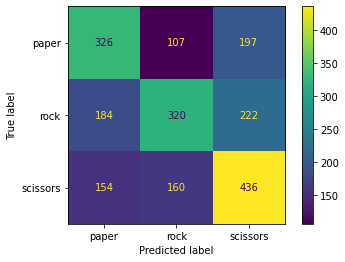

              precision    recall  f1-score     support
paper          0.631508  0.521772  0.491262  126.000000
rock           0.700486  0.443582  0.409037  145.200000
scissors       0.659263  0.577766  0.484170  150.000000
accuracy       0.513715  0.513715  0.513715    0.513715
macro avg      0.663753  0.514373  0.461489  421.200000
weighted avg   0.668776  0.513715  0.462417  421.200000


In [ ]:
cv = KFold(n_splits=5, shuffle=True)
ANN_CMs = [] # all Confusion Matrices
ANN_reports = [] # all Classification Reports

# Cross Validation
for train_index, test_index in cv.split(list(range(len(ANN_dataset.targets)))):
  ANN = ANNModel()
  ANN = ANN.to(device)

  criterion=nn.CrossEntropyLoss()
  optimizer=torch.optim.Adam(ANN.parameters(), lr=0.0001)

  # Define Dataset and Dataloader
  train_data = torch.utils.data.Subset(ANN_dataset, train_index)
  test_data = torch.utils.data.Subset(ANN_dataset, test_index)

  train_loader=DataLoader(train_data,batch_size=16,shuffle=True)
  test_loader=DataLoader(test_data,batch_size=64)

  # Training Process
  epochs = 5
  for i in range(epochs):
    for images, labels in tqdm(train_loader):
      images = images.to(device)
      labels = labels.to(device)
      y_pred=ANN(images.view(-1, 224*224))
      loss=criterion(y_pred, labels)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()      

    with torch.no_grad():
      corrects = 0
      totals = 0
      for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        y_val=ANN(images.view(-1, 224*224)).view(-1, 3)
        loss=criterion(y_val, labels)        
        predicted=torch.max(y_val.data,1)[1]
        corrects += (predicted==labels).sum()
        totals += predicted.size(dim=0)

      print(f"epoch: {i+1} loss: {loss} accuracy: {corrects/totals}%")

  # Validation Process
  with torch.no_grad():
    predictions = []
    targets = []

    for images, labels in test_loader:
      images = images.to(device)
      labels = labels.to(device)
      y_val=ANN(images.view(-1, 224*224)).view(-1, 3)
      loss=criterion(y_val, labels)        
      predicted=torch.max(y_val.data,1)[1]
      predictions.append(predicted.cpu().numpy())
      targets.append(labels.cpu().numpy())
  
    predictions = np.concatenate(predictions, axis=0)
    targets = np.concatenate(targets, axis=0)
    CM = confusion_matrix(targets, predictions)
    report = classification_report(targets, predictions, target_names=np.array(class_names), digits=4, output_dict=True)

    ANN_CMs.append(CM)
    ANN_reports.append(report)

avg_report = report_average(ANN_reports)
total_CM = sum(ANN_CMs)
disp = ConfusionMatrixDisplay(confusion_matrix=total_CM, display_labels=np.array(class_names))
disp.plot()
plt.show()
print(pd.DataFrame(avg_report).T)